In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df= pd.read_csv("canada_per_capita_income.csv")

In [4]:
print(df.shape)

(47, 2)


In [5]:
print(df.isnull().sum())

year                       0
per capita income (US$)    0
dtype: int64


In [6]:
print("number of duplicated records =",df.duplicated().sum())

number of duplicated records = 0


In [7]:
# our data set is clean 
print(df.columns)
df=df.rename(columns = {'per capita income (US$)':'income'})
print("column name after rename =",df.columns)

Index(['year', 'per capita income (US$)'], dtype='object')
column name after rename = Index(['year', 'income'], dtype='object')


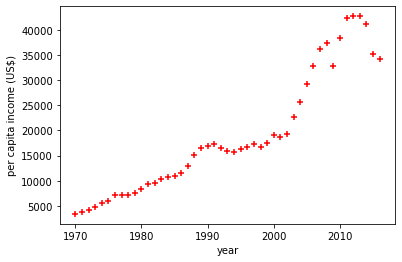

In [8]:
%matplotlib inline
plt.xlabel('year')
plt.ylabel('per capita income (US$)')
plt.scatter(df["year"],df["income"],color='red',marker='+')

In [9]:
new_data=df.drop('income',axis='columns')

In [10]:
income=df.income

In [11]:
# we have one dipendent column 'per capita income (US$)' and one independent column 'year' so we use linear reg.
# creating the object of linear regression
from sklearn import linear_model
# Create linear regression object
reg = linear_model.LinearRegression()

In [12]:
reg.fit(new_data,income)

LinearRegression()

In [13]:
#predict income for 2017
print(reg.predict([[2017]]))

[38803.29886875]


In [14]:
m=reg.coef_

In [15]:
b=reg.intercept_

In [16]:
# we know that
# Y = m * X + b (m is coefficient and b is intercept)
Y=m*2017+b
print(Y)

[38803.29886875]


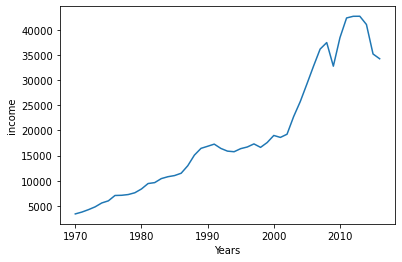

In [17]:
plt.plot(df['year'],df['income'])
plt.xlabel('Years')
plt.ylabel('income')
plt.show()

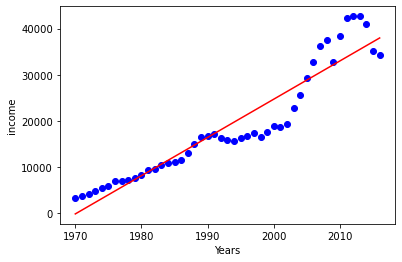

In [18]:
p=reg.predict(new_data)
plt.scatter(df.year,df.income,c="b",label="original value")
plt.plot(new_data.year,p,c="r",label="predicted value")
plt.xlabel('Years')
plt.ylabel('income')
plt.show()

In [19]:
new_df = pd.DataFrame({'Year': [2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025, 2026, 2027]})

In [20]:
current_year_features = new_df['Year'].values.reshape(-1, 1)

# Make the predictions
predicted_income = reg.predict(current_year_features)

In [21]:
predictions_df = pd.DataFrame({'Year': new_df['Year'], 'Predicted Income': predicted_income})
print(predictions_df)

    Year  Predicted Income
0   2017      38803.298869
1   2018      39631.763944
2   2019      40460.229019
3   2020      41288.694094
4   2021      42117.159170
5   2022      42945.624245
6   2023      43774.089320
7   2024      44602.554395
8   2025      45431.019471
9   2026      46259.484546
10  2027      47087.949621


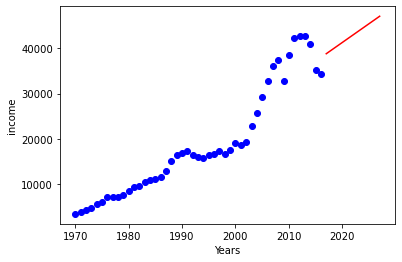

In [22]:
plt.scatter(df.year,df.income,c="b",label="original value")
plt.plot(predictions_df.Year,predictions_df['Predicted Income'],c="r",label="predicted value")
plt.xlabel('Years')
plt.ylabel('income')
plt.show()